# CA01: Exploratory Data Analysis – House Price Analysis

Explored the training dataset, identified data quality issues, performed data cleaning based on those issues, and analyzed collinearity among numeric features.

This notebook follows the general EDA workflow covered in Lecture #2 and the example dataset (data understanding, missing values, outliers, and collinearity).

I used ChatGPT to assist with the general layout, some code, and the analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [3]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(df.shape)

(1460, 81)


## Dataset Overview

The dataset loaded successfully from the provided training link. Each row represents a home sale record, and the target variable is **SalePrice**. Initial checks using head/shape confirm the dataset size and basic structure.

In [5]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Understanding the Structure of the Data

The dataset contains a mix of numeric and categorical variables. A missing value scan shows that several columns have substantial missingness. Many of the most-missing fields appear to describe optional amenities (e.g., alley, pool quality, fence, garage/basement attributes), suggesting missing values may often represent feature absence rather than errors.

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Initial Look at Missing Values

Summary statistics provide the range and typical values for numeric variables, which helps identify potential outliers and understand the scale of important predictors (e.g., square footage, year built, garage capacity).

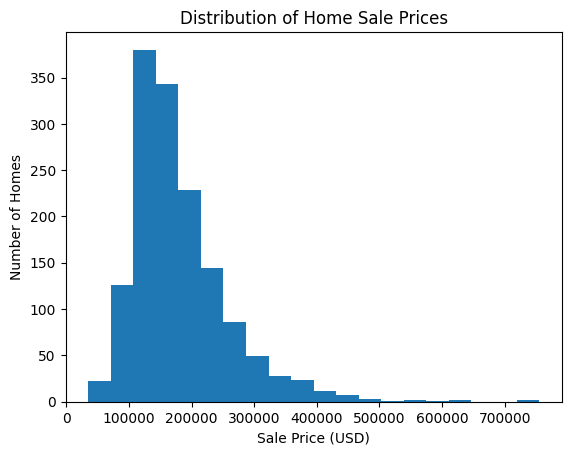

In [9]:
plt.hist(df["SalePrice"], bins = 20)
plt.title("Distribution of Home Sale Prices")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Number of Homes")
plt.show()


The SalePrice distribution is right-skewed, with most homes clustered in the lower-to-mid price range and fewer high-priced properties. This is typical for housing data and suggests that extreme values may influence the mean.

## Summary Statistics for Numeric Features

Most houses cluster in the lower-to-mid price range, with a long tail of expensive homes. This is common for housing data and is important context when interpreting relationships between predictors and SalePrice.


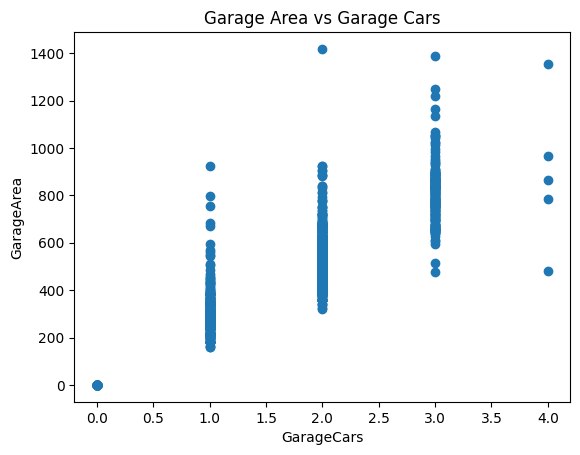

In [10]:
plt.scatter(df["GarageCars"], df["GarageArea"])
plt.xlabel("GarageCars")
plt.ylabel("GarageArea")
plt.title("Garage Area vs Garage Cars")
plt.show()

Garage area and garage car capacity are strongly correlated, as larger garages are designed to hold more vehicles. This indicates redundancy between the two variables, since both capture similar information about garage size. In modeling, one of these features could be removed without substantial information loss.

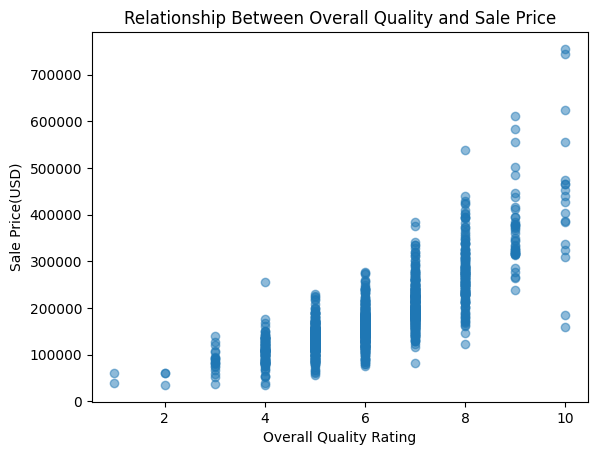

In [11]:
plt.scatter(df["OverallQual"], df["SalePrice"], alpha = 0.5)
plt.xlabel("Overall Quality Rating")
plt.ylabel("Sale Price(USD)")
plt.title("Relationship Between Overall Quality and Sale Price")
plt.show()

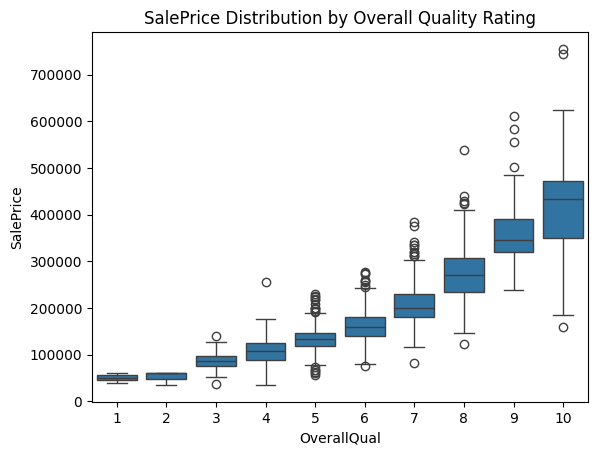

In [12]:
sns.boxplot(x = df["OverallQual"], y = df["SalePrice"])
plt.title("SalePrice Distribution by Overall Quality Rating")
plt.show()

The plot shows a clear positive association between overall quality and sale price, with higher-quality homes consistently selling at higher prices. The relationship appears stronger and more structured than many size-based features. This suggests overall quality is a key predictor of housing prices.

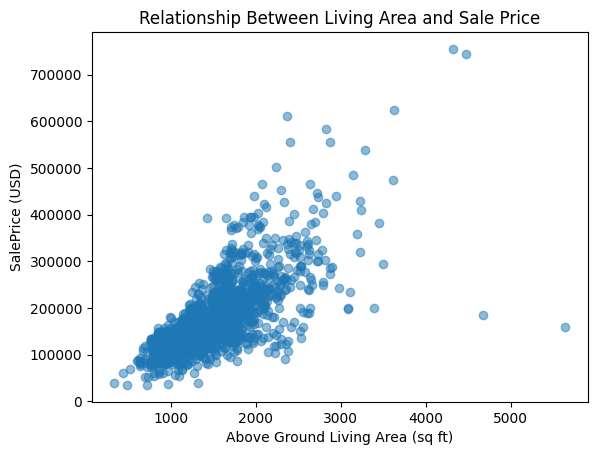

In [13]:
plt.scatter(df["GrLivArea"], df["SalePrice"], alpha=0.5)
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("SalePrice (USD)")
plt.title("Relationship Between Living Area and Sale Price")
plt.show()

Sale price generally increases as above-ground living area increases, indicating a strong positive relationship between size and value. Larger homes command higher prices, although there is more variability among very large houses. This spread suggests other factors, such as quality and location, also influence pricing at higher sizes.

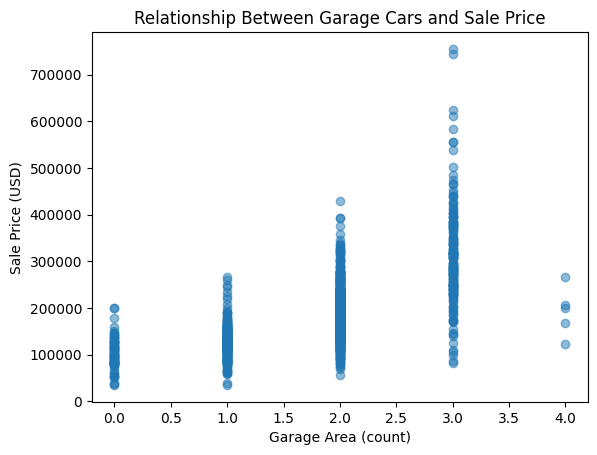

In [14]:
plt.scatter(df["GarageCars"], df["SalePrice"], alpha = 0.5)
plt.xlabel("Garage Area (count)")
plt.ylabel("Sale Price (USD)")
plt.title("Relationship Between Garage Cars and Sale Price")
plt.show()

Homes with larger garage capacity tend to have higher sale prices, particularly when moving from one- to two-car garages. The relationship flattens slightly at higher garage counts, indicating diminishing returns. Garage size appears to be an important but secondary contributor to price.

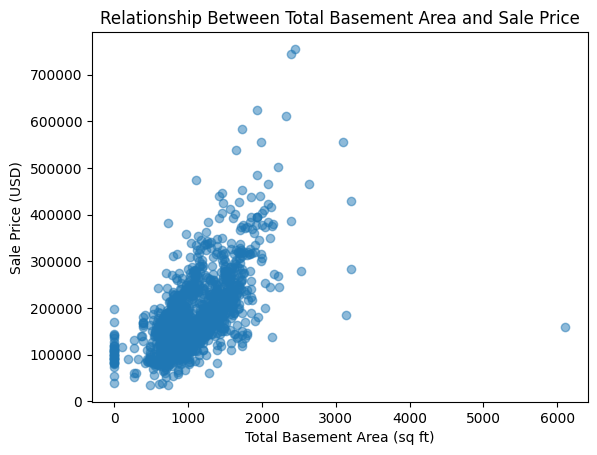

In [15]:
plt.scatter(df["TotalBsmtSF"], df["SalePrice"], alpha = 0.5)
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.title("Relationship Between Total Basement Area and Sale Price")
plt.show()

Properties with larger basement areas generally sell for more, reflecting the added usable space. The relationship is positive but more dispersed, suggesting that basement size contributes to price alongside other structural features. Finished and unfinished basement differences may also affect this variation.

## Exploring the Distribution of SalePrice

The scatterplots show that several predictors have clear positive relationships with SalePrice. Overall quality and above-ground living area show particularly strong upward trends. Garage capacity and basement area also increase with SalePrice, although the pattern may be less smooth due to discrete values and structural differences across homes.


In [16]:
dq_summary = pd.DataFrame({
    "Missing_Count": df.isnull().sum(),
    "Missing_Percent": df.isnull().mean(),
    "Unique_Values": df.nunique(),
    "Data_Type": df.dtypes
}).sort_values(by="Missing_Percent", ascending=False)

dq_summary.head(15)

,Missing_Count,Missing_Percent,Unique_Values,Data_Type
PoolQC,1453,0.995205,3,object
MiscFeature,1406,0.963014,4,object
Alley,1369,0.937671,2,object
Fence,1179,0.807534,4,object
MasVnrType,872,0.597260,3,object
FireplaceQu,690,0.472603,5,object
LotFrontage,259,0.177397,110,float64
GarageQual,81,0.055479,5,object
GarageFinish,81,0.055479,3,object
GarageType,81,0.055479,6,object


In [17]:
dq_summary[["Missing_Count","Missing_Percent"]].head(6)

,Missing_Count,Missing_Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603


## Relationships Between Key Features and SalePrice

The data quality report quantifies missingness, unique values, and data types across features. Several variables show high missing percentages, so I avoided using a fixed cutoff rule and instead looked at what each feature represents. Many of these variables describe optional amenities (e.g., pools, fences, alleys, garage and basement features), suggesting that missing values often indicate feature absence rather than data entry errors. For example, PoolQC is missing for ~99.5% of homes and Alley for ~93.8%, which likely indicates the feature is absent rather than an entry error.
Based on class discussion and the data description, I chose not to rely on a strict missingness threshold and instead handled missing values according to what the variable represents. The report is used to justify the cleaning decisions applied next.

In [18]:
df_processed = df.copy()

## Cleaning Decisions and Rationale

Cleaning was performed on a copy of the raw data to preserve the original dataset. Several variables show high proportions of missing values; however, many of these fields describe optional amenities (such as pools, fences, alleys, fireplaces, and certain garage or basement attributes). In these cases, missing values indicate that the feature is not present for a given property rather than a data entry issue. Rather than applying a strict missingness threshold, each variable was evaluated using the documentation, and amenity-related features were retained and handled through targeted imputation instead of being dropped.


In [19]:
fill_rules = {"None": ["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu",
             "GarageType","GarageFinish","GarageQual","GarageCond",
             "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"],
    0: ["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","BsmtFinSF2",
        "BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","MasVnrArea"]}

for val, cols in fill_rules.items():
    df_processed[cols] = df_processed[cols].fillna(val)

In [20]:
df_processed["LotFrontage"] = df_processed.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [21]:
df_processed.isnull().sum().sort_values(ascending=False).head()

,0
Electrical,1
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0


After cleaning, I re-checked the top missing columns to confirm no major nulls remained.

## Verifying the Results of Data Cleaning


In [22]:
df_processed.shape #Cleaning did not change the number of observations.

(1460, 81)

A post-cleaning missing value check confirms that the selected imputation approach reduced or eliminated missing values in key fields. This confirms the dataset is ready for collinearity inspection.







## Examining Correlation and Potential Collinearity

Correlation was computed using numeric features only (categorical variables are excluded). The heatmap shows several strongly correlated size-related variables, some variables are basically measuring the same ‘size’ concept in different ways. In later modeling work, highly correlated features may be candidates for feature selection to reduce multicollinearity.

In [23]:
corr = df_processed.select_dtypes(include=["int64", "float64"]).corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.003381,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.003381,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.033226,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


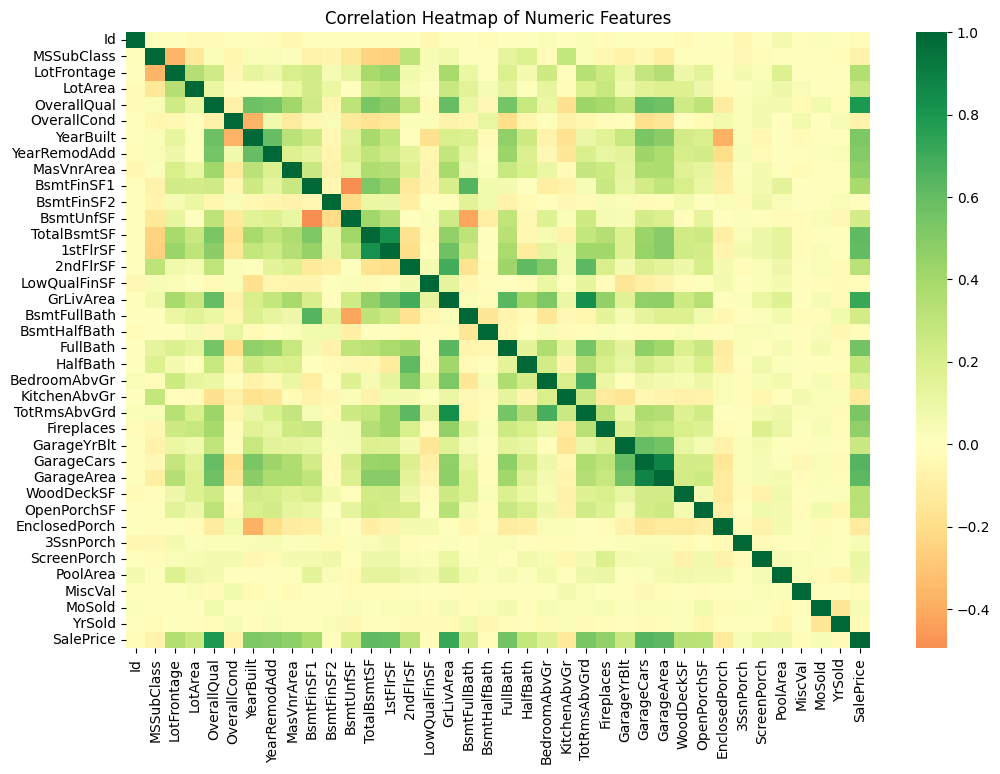

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_processed.corr(numeric_only = True),cmap = "RdYlGn", center = 0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [25]:
# Identify highly correlated feature pairs (absolute correlation > 0.6)
corr_matrix = df_processed.select_dtypes(include=["int64", "float64"]).corr()

high_corr = (
    corr_matrix.abs()
    .where(corr_matrix.abs() > 0.6)
    .stack()
    .reset_index())

high_corr.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove self-correlations
high_corr = high_corr[high_corr["Feature_1"] != high_corr["Feature_2"]]

high_corr.sort_values(by = "Correlation", ascending = False)


,Feature_1,Feature_2,Correlation
51,GarageArea,GarageCars,0.882475
49,GarageCars,GarageArea,0.882475
29,GrLivArea,TotRmsAbvGrd,0.825489
42,TotRmsAbvGrd,GrLivArea,0.825489
18,1stFlrSF,TotalBsmtSF,0.819530
16,TotalBsmtSF,1stFlrSF,0.819530
63,SalePrice,OverallQual,0.790982
6,OverallQual,SalePrice,0.790982
30,GrLivArea,SalePrice,0.708624
66,SalePrice,GrLivArea,0.708624


Several feature pairs exhibit correlations above 0.6, primarily among size-related variables (e.g., living area, room counts, garage measures). These variables capture related but not identical aspects of a home’s structure and layout. For CA01, highly correlated features were retained to preserve interpretability, with feature reduction deferred to later modeling stages.

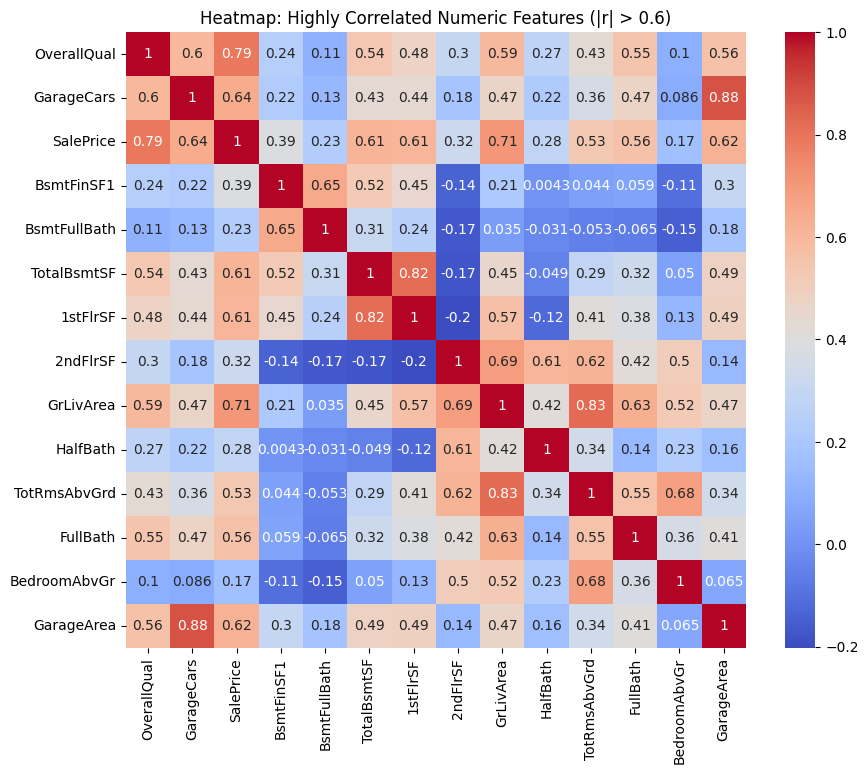

In [26]:
# Get the set of features that appear in high correlations
high_corr_features = pd.unique(
    high_corr[["Feature_1", "Feature_2"]].values.ravel())

# Correlation matrix for just those features
hc_matrix = df_processed[high_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(hc_matrix, cmap = "coolwarm", annot = True)
plt.title("Heatmap: Highly Correlated Numeric Features (|r| > 0.6)")
plt.show()

Although this heatmap focuses on features involved in at least one strong correlation (|r| > 0.6), not all pairwise relationships among these variables exceed the threshold. This confirms that collinearity is localized to specific feature pairs rather than pervasive across all variables.

This focused heatmap highlights strong correlations among size- and capacity-related features such as living area, room counts, and garage measures. The patterns confirm that several variables capture overlapping structural characteristics of homes. These relationships were evaluated to understand redundancy, but features were retained for interpretability at the EDA stage.

The correlation analysis shows several highly correlated pairs among size-related variables (e.g., GarageCars–GarageArea, GrLivArea–TotRmsAbvGrd, 1stFlrSF–TotalBsmtSF). These relationships indicate overlap in what the variables measure (home size/capacity). For CA01, I did not drop features because collinearity mainly becomes an issue during model estimation; instead, I flagged these pairs as candidates for later feature selection. If a model were built, I would consider keeping the more interpretable feature from each pair.

## Conclusion

This notebook completed EDA, documented data quality issues, applied justified missing-value treatments, and examined collinearity among numeric variables. The cleaned dataset is now prepared for subsequent modeling steps, which are outside the scope of CA01.